In [2]:
import h5py
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Read all data from the nodes and edges file saved by build_network.py

In [4]:
def SaveDataToDF(f):
    myData = []
    myDataNames = []
    def saveDat(item):
        if 'Data' in str(f[item].id):
            data2use = f[item][()]
            if data2use.ndim == 2:#some groups have multiple columns and this messes up the translation to a df at the end of this function
                [a,b] = data2use.shape
                for col in np.arange(0,b):
                    myData.append(data2use[:,col])
                    dataName = (f[item].name).split('/')[-1] + str(col)
                    myDataNames.append(dataName)
            else:
                myData.append(f[item][()])
                dataName = (f[item].name).split('/')[-1]
                myDataNames.append(dataName)
        
    f.visit(saveDat)
    allData = pd.DataFrame(myData).T
    allData.columns = myDataNames
    f.close()
    return allData

In [3]:
pathname = r'/network'

In [4]:
f = h5py.File(os.path.join(pathname,'biophysical_biophysical_edges.h5'), 'r')
f.visit(print)

edges
edges/biophysical_to_biophysical
edges/biophysical_to_biophysical/0
edges/biophysical_to_biophysical/0/nsyns
edges/biophysical_to_biophysical/edge_group_id
edges/biophysical_to_biophysical/edge_group_index
edges/biophysical_to_biophysical/edge_type_id
edges/biophysical_to_biophysical/indices
edges/biophysical_to_biophysical/indices/source_to_target
edges/biophysical_to_biophysical/indices/source_to_target/node_id_to_range
edges/biophysical_to_biophysical/indices/source_to_target/range_to_edge_id
edges/biophysical_to_biophysical/indices/target_to_source
edges/biophysical_to_biophysical/indices/target_to_source/node_id_to_range
edges/biophysical_to_biophysical/indices/target_to_source/range_to_edge_id
edges/biophysical_to_biophysical/source_node_id
edges/biophysical_to_biophysical/target_node_id


In [5]:
edgesDF = SaveDataToDF(f) 

In [6]:
edgesDF

,nsyns,edge_group_id,edge_group_index,edge_type_id,node_id_to_range0,node_id_to_range1,range_to_edge_id0,range_to_edge_id1,node_id_to_range0,node_id_to_range1,range_to_edge_id0,range_to_edge_id1,source_node_id,target_node_id
0,1.0,0.0,0.0,101.0,0.0,1479.0,840993.0,840994.0,0.0,1.0,0.0,246.0,21982.0,0.0
1,1.0,0.0,1.0,104.0,1479.0,2526.0,1121429.0,1121430.0,1.0,2.0,246.0,409.0,31873.0,0.0
2,1.0,0.0,2.0,104.0,2526.0,3917.0,756536.0,756537.0,2.0,3.0,409.0,659.0,253.0,0.0
3,1.0,0.0,3.0,101.0,3917.0,5218.0,1378903.0,1378904.0,3.0,4.0,659.0,864.0,8167.0,0.0
4,1.0,0.0,4.0,107.0,5218.0,6170.0,1006843.0,1006844.0,4.0,5.0,864.0,1024.0,176.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631825,1.0,0.0,1631825.0,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30021.0,32013.0
1631826,1.0,0.0,1631826.0,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17270.0,32013.0
1631827,1.0,0.0,1631827.0,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14976.0,32013.0
1631828,1.0,0.0,1631828.0,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3507.0,32013.0


In [7]:
f = h5py.File(os.path.join(pathname,'biophysical_nodes.h5'), 'r')

In [8]:
f.visit(print)

nodes
nodes/biophysical
nodes/biophysical/0
nodes/biophysical/0/positions
nodes/biophysical/node_group_id
nodes/biophysical/node_group_index
nodes/biophysical/node_id
nodes/biophysical/node_type_id


In [9]:
nodesDF = SaveDataToDF(f)

In [10]:
nodesDF

,positions0,positions1,positions2,node_group_id,node_group_index,node_id,node_type_id
0,380,460,360,0,0,0,100
1,340,880,380,0,1,1,100
2,180,260,320,0,2,2,100
3,200,200,400,0,3,3,100
4,100,920,380,0,4,4,100
...,...,...,...,...,...,...,...
32009,160,460,280,0,32009,32009,107
32010,60,140,180,0,32010,32010,107
32011,160,60,300,0,32011,32011,107
32012,340,600,240,0,32012,32012,107


# change the node ids to node names

In [11]:
cellLocations = pd.read_csv('cell_locations.csv')

In [12]:
idNames = np.unique(nodesDF['node_type_id'])
cellNames = np.unique(cellLocations['Cell type'])

In [13]:
array = cellLocations['Cell type']
idxs = np.unique(cellLocations['Cell type'],return_index=True)[1]
cellNames = [array[index] for index in sorted(idxs)]#use the names in the order in which the id's appear

In [14]:
nodesDF = nodesDF.replace({'node_type_id':idNames},{'node_type_id':cellNames})
nodesDF

,positions0,positions1,positions2,node_group_id,node_group_index,node_id,node_type_id
0,380,460,360,0,0,0,AAC in SO layer
1,340,880,380,0,1,1,AAC in SO layer
2,180,260,320,0,2,2,AAC in SO layer
3,200,200,400,0,3,3,AAC in SO layer
4,100,920,380,0,4,4,AAC in SO layer
...,...,...,...,...,...,...,...
32009,160,460,280,0,32009,32009,PV in SR layer
32010,60,140,180,0,32010,32010,PV in SR layer
32011,160,60,300,0,32011,32011,PV in SR layer
32012,340,600,240,0,32012,32012,PV in SR layer


In [19]:
fig = px.scatter_3d(nodesDF,x ='positions0', y='positions1', z='positions2',
                    color = 'node_type_id',
                    opacity = 0.7)
fig.update_traces(marker_size = 6)
fig.write_html('networkNodes2.html',auto_open=True)

# plot nodes edges - wip

In [ ]:
#find the node source id and get its position, then find the destination node id, and get its position
#there will be a -1 x 6 array of the source to target connections

In [28]:
xlocofEdgeSource = nodesDF['positions0'][np.array(edgesDF['source_node_id'])]
YlocofEdgeSource = nodesDF['positions1'][np.array(edgesDF['source_node_id'])]
ZlocofEdgeSource = nodesDF['positions2'][np.array(edgesDF['source_node_id'])]

In [29]:
xlocofEdgedest = nodesDF['positions0'][np.array(edgesDF['target_node_id'])]
YlocofEdgedest = nodesDF['positions1'][np.array(edgesDF['target_node_id'])]
ZlocofEdgedest = nodesDF['positions2'][np.array(edgesDF['target_node_id'])]

In [30]:
locsList = [xlocofEdgeSource,YlocofEdgeSource,ZlocofEdgeSource,xlocofEdgedest,YlocofEdgedest,ZlocofEdgedest]
locsList = [np.array(item).reshape(1,-1) for item in locsList]
df = pd.DataFrame(np.concatenate(locsList)).T
fig = px.line_3d(df, x=0, y=1,z=2)
fig.write_html('testfig.html',auto_open=True)

In [31]:
source,dest = np.array(edgesDF['source_node_id']),np.array(edgesDF['target_node_id'])

In [32]:
pairs = np.vstack((source,dest)).T
pairs = pairs.astype(int)

In [33]:
X,Y,Z = np.array(nodesDF['positions0']),np.array(nodesDF['positions1']),np.array(nodesDF['positions2'])

In [520]:
x_lines = []
y_lines = []
z_lines = []

#create the coordinate list for the lines
for p in pairs:
    for i in range(2):
        x_lines.append(X[p[i]])
        y_lines.append(Y[p[i]])
        z_lines.append(Z[p[i]])
    x_lines.append(None)
    y_lines.append(None)
    z_lines.append(None)

trace2 = go.Scatter3d(
    x=x_lines,
    y=y_lines,
    z=z_lines,
    mode='lines',
    name='lines'
)

figlines = go.Figure(data=[ trace2])


In [ ]:
fig.write_html('testfig.html',auto_open=True)

### construct adjacency matrix of the directed graph

In [ ]:
# nxn nodeids
#each row is the number of outgoing connections to nodeids in the columns

In [15]:
targetIDs = np.array(edgesDF['target_node_id'])
sourceIDs = np.array(edgesDF['source_node_id'])
source2targetIDs = pd.DataFrame(np.vstack((sourceIDs,targetIDs))).T
source2targetIDs.columns = ['source','target']
df = source2targetIDs
nodeArray = np.array(df)# nice to have a df for viewing and array for computing

In [16]:
#get the counts of source to target

In [17]:
IDS = np.arange(0,len(np.unique(df['source'])))
adj = np.zeros((len(IDS),len(IDS)))#nxn matrix


In [18]:
for i in range(0,len(IDS)):
    idxs = nodeArray[nodeArray[:,0]==i][:,1]#grab the targets for which the source id is i...
    #add something for checking unique, or rate of messages, or something to add as the values instead of just 1 for a connection.
    adj[i][idxs.astype(int)] = 1#... and place a 1 in that location. ideally this is the count of connections to this target, but for now it is only 1 connection in the model

In [23]:
np.save('adjacencyMatrix',adj)

# use the adjacency matrix to calculate summary statistics about the network

In [7]:
import networkx as nx

In [6]:
adj = np.load('adjacencyMatrix.npy')
cellLocations = pd.read_csv('cell_locations.csv')


In [131]:
#get a list of the layer names in order of 
layerList = cellLocations['Cell type']
idxs = np.unique(cellLocations['Cell type'],return_index=True)[1]
layerNames = [array[index] for index in sorted(idxs)]#use the names in the order in which the id's appear


In [68]:
# first get a df of the cell layers and their index boundaries

In [41]:
def getSectionBeginEnd(layerNames,name):
    group = np.where(layerNames == name)[0]
    begin = group[0]
    end = group[len(group)-1]
    return begin,end

In [141]:
starts,ends = [], []

nameSet = list(set(layerNames))
for name in layerNames:
    begin, end = getSectionBeginEnd(layerList,name)
    starts.append(begin)
    ends.append(end)


In [142]:
df1 = pd.DataFrame(starts,index = nameSet, columns = ['start'])
df2 = pd.DataFrame(ends,index = nameSet, columns = ['end'])
layerIdxsDF = pd.concat([df1,df2],axis=1)
layerIdxsDF

,start,end
AAC in SP layer,0,34
Pyr in SP layer,35,198
AAC in SO layer,199,330
PV in SO layer,331,31480
OLM in SO layer,31481,31583
PV in SR layer,31584,31971
PV in SP layer,31972,31980
AAC in SR layer,31981,32013


In [78]:
G = nx.from_numpy_array(adj,create_using=nx.DiGraph)#directed graph of the network, recall rows are senders, columns are recievers

In [237]:
def groupSumStats(G,IDS):
    out_degree_centrality = nx.group_out_degree_centrality(G,IDS)
    in_degree_centrality = nx.group_in_degree_centrality(G,IDS)
    clusterDict = nx.clustering(G, IDS)
    avgClustering = np.mean([clusterDict[key] for key in clusterDict])
    return [in_degree_centrality,out_degree_centrality,avgClustering]

In [209]:
def calcNetStats(G,layerList,layerNames):
    AllStats = []
    for name in layerNames:
        IDS = np.where(layerList == name)[0]
        AllStats.append(groupSumStats(G,IDS))
    return AllStats

In [238]:
netStats = calcNetStats(G,layerList,layerNames)

[0, 13732, 4]


In [242]:
results.to_csv('networkStats.csv')

In [175]:
# make a dataframe with rows are layer names, and columns with the given metric's summary stats

In [241]:

netStatNames = ["inDeg_cent","outDeg_cent","avgClustering"]
results = pd.DataFrame(netStats,columns = netStatNames,index = layerNames)
results

,inDeg_cent,outDeg_cent,avgClustering
AAC in SO layer,0.176178,0.712812,0.002812
OLM in SO layer,0.977991,0.998619,0.001232
PV in SO layer,0.817013,0.969418,0.005264
Pyr in SP layer,1.000000,1.000000,0.057975
AAC in SP layer,0.450158,0.960014,0.002537
PV in SP layer,0.986688,0.994720,0.005061
AAC in SR layer,0.054460,0.290267,0.002830
PV in SR layer,0.353960,0.608955,0.005015


In [240]:
#other metrics to explore:
print(nx.shortest_path(G, source=0, target=4))

[0, 13732, 4]


In [114]:
test.index

RangeIndex(start=0, stop=1, step=1)

In [ ]:
#just get the indices of the layer ranges, and comput the sum stats over that in the adj matrix

In [42]:
np.where(cent==max(cent))

(array([93], dtype=int64),)

In [46]:
layerNames[np.where(cent==max(cent))[0]]

93    OLM in SO layer
Name: node_type_id, dtype: object

In [29]:
adjacencyDF = pd.DataFrame(adj,columns = IDS,index=IDS)

32014

# model output results

In [23]:
outpath = 'output'

In [24]:
f = h5py.File(os.path.join(outpath,'spikes.h5'), 'r')
f.visit(print)

spikes
spikes/biophysical
spikes/biophysical/node_ids
spikes/biophysical/timestamps


In [25]:
spikesDF = SaveDataToDF(f) 

In [26]:
spikesDF

,node_ids,timestamps
0,5.0,155.0
1,13.0,155.0


In [27]:
f = h5py.File(os.path.join(outpath,'v_report.h5'), 'r')
f.visit(print)

report
report/biophysical
report/biophysical/data
report/biophysical/mapping
report/biophysical/mapping/element_ids
report/biophysical/mapping/element_pos
report/biophysical/mapping/index_pointer
report/biophysical/mapping/node_ids
report/biophysical/mapping/time


In [28]:
traces = f['report/biophysical/data'][()]

In [29]:
f.close()

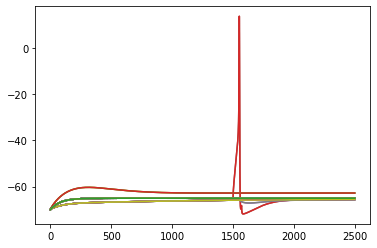

In [30]:
plt.plot(traces[:,0:100])
plt.show()

In [38]:
f = h5py.File('CA1_inputs/bg_pn_spikes.h5', 'r')
f.visit(print)

spikes


In [48]:
!wget https://github.com/AllenInstitute/bmtk/blob/develop/docs/examples/spikes_inputs/lgn_spikes.h5?raw=true -O lgn_spikes.h5



'wget' is not recognized as an internal or external command,
operable program or batch file.


In [49]:
f = h5py.File('output\ecp.h5', 'r')
f.visit(print)

ecp
ecp/channel_id
ecp/data
ecp/time


In [55]:
data = f['ecp/data'][()]
time = f['ecp/time'][()]

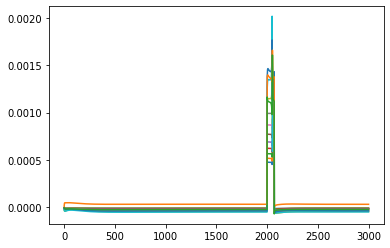

In [60]:
plt.plot(data)

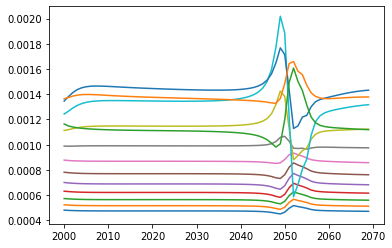

In [121]:
start,end = 2000,2070
plt.plot(np.arange(start,end),data[start:end])
plt.show()

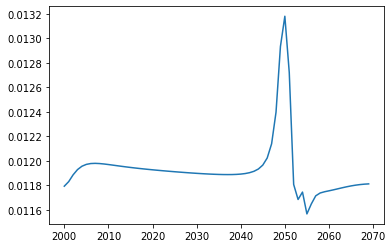

In [122]:
plt.plot(np.arange(start,end),np.sum(data[start:end],axis=1))
plt.show()

# TESTING

In [68]:
from bmtk.utils.reports.spike_trains import PoissonSpikeGenerator

In [70]:
numPyr = 30 
t_stim = 1000.0

In [117]:
psg = PoissonSpikeGenerator(population='bg_pn')

psg.add(node_ids=range(0,numPyr),  # need same number as cells
        firing_rate=5,    # 1 spike every 5 seconds Hz
        times=(0.0, t_stim/1000))  # time is in seconds for some reason


In [83]:
dir(psg)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_fixed_fr',
 '_build_inhomegeous_fr',
 'adaptor',
 'add',
 'from_csv',
 'from_nwb',
 'from_sonata',
 'load',
 'max_spikes_per_node',
 'time_range']

In [110]:
psg.time_range()

(nan, nan)

In [118]:
psg.to_csv('CA1_inputs/bg_pn_spikes.txt')

In [123]:
f.close()